In [3]:
import torch
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


(-0.04991326928138733,
 1.0495358526706695,
 -0.049361091852188115,
 1.0472569286823272)

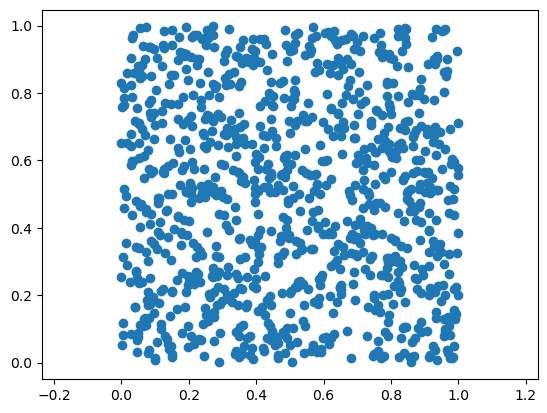

In [4]:
# Generate random numbers, 1000 x 2 random numbers (1000 random points between 0 and 1)
x = torch.rand([1000,2])
scatter(*x.numpy().T) # Create scatter plot
axis('equal') # Ensures plot won't be distorted

(-0.04991326928138733,
 1.0495358526706695,
 -0.049361091852188115,
 1.0472569286823272)

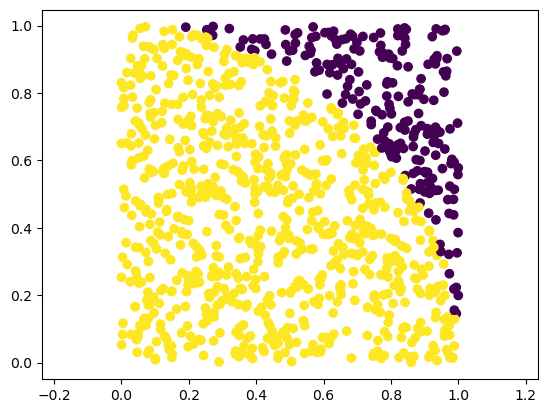

In [6]:
# Calculate squared norm, if < 1 then it is in circle
x_in_circle = (x**2).sum(1) < 1

scatter(*x.numpy().T, c=x_in_circle.numpy()) # Scatter plot, c = ... is for color
axis('equal') # Un-distorted plot

accuracy tensor(0.2970)


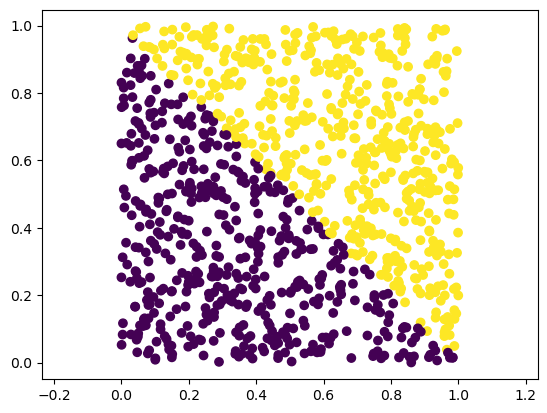

In [7]:
# Define linear classifier

# Weights
weights = torch.as_tensor([1,1], dtype=torch.float)
# Bias
bias = torch.as_tensor(-1, dtype=torch.float) # Scalar, value of -1

# Classify
def classify(x, weights, bias):
    return (x * weights[None,:]).sum(dim=1) + bias > 0 # Uses broadcasting, return label of 1 if > 0, return label of 0 if < 0

# Accuracy measure
def accuracy(pred_label):
    return (pred_label==x_in_circle).float().mean() # Average number of predictions that match our label (X inside a circle)

# Show function (plots the points)
def show(y):
    scatter(*x.numpy().T, c=y.detach().numpy())
    axis('equal')

# Compute the prediction
pred_y = classify(x, weights, bias)
show(pred_y)
print('accuracy', accuracy(pred_y))

In [9]:
# Logistic Regression

# Prediction of logistic regression
def predict(x, weights, bias):
    logit = (x * weights[None,:]).sum(dim=1) + bias
    return 1/(1+(-logit).exp()) # Feed logit into a sigmoid

# Now compute the cross-entropy
# Important note: log function here cannot deal with zero inpust, so if probability is ever zero or one, log will return either infinity or NaN
# To avoid this, can add small quantity of 1e-10 at the end
def loss(prediction):
    return -(x_in_circle.float()     * (prediction+1e-10).log() +
             (1-x_in_circle.float()) * (1-prediction+1e-10).log() ).mean()

# Compute prediction in same way as above
p_y = predict(x, weights, bias)
print( 'loss =', loss(p_y), 'accuracy =', accuracy(pred_y) )

loss = tensor(0.8290) accuracy = tensor(0.2970)


loss = tensor(0.4817) accuracy = tensor(0.9080)


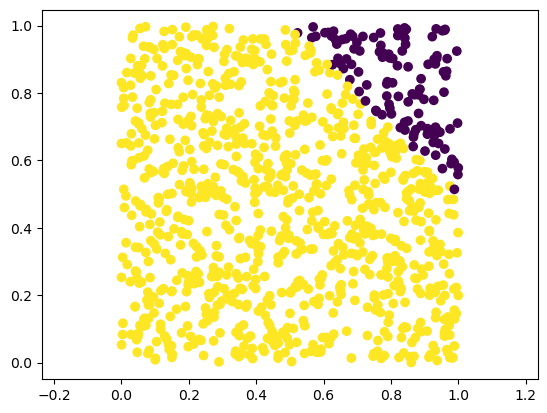

In [11]:
# Tuning
weights = torch.as_tensor([-1,-1], dtype=torch.float)
# Change bias from 1.0 to 1.5, improves accuracy from 70% to 90%
# This takes a long time manually, how do we do this automatically? This is discussed in future segment...
bias = torch.as_tensor(1.5, dtype=torch.float)

pred_y = classify(x, weights, bias)
p_y = predict(x, weights, bias)

show(pred_y)
print( 'loss =', loss(p_y), 'accuracy =', accuracy(pred_y) )

loss = tensor(0.5439) accuracy = tensor(0.8930)


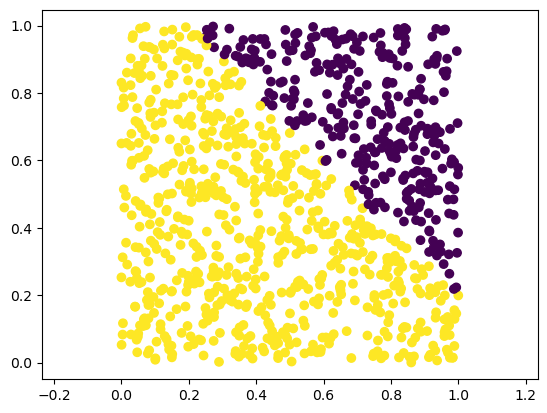

In [12]:
weights = torch.as_tensor([-1,-1], dtype=torch.float)
bias = torch.as_tensor(1.2, dtype=torch.float) # Different bias value, results in 89% accuracy

pred_y = classify(x, weights, bias)
p_y = predict(x, weights, bias)

show(pred_y)
print( 'loss =', loss(p_y), 'accuracy =', accuracy(pred_y) )